In [ ]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape

(891, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df['age']=df['age'].fillna(df['age'].mean())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df.drop(columns=['deck'],inplace=True)


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
missing=pd.DataFrame(
    {
        'missing_count':df.isnull().sum(),
        'missing_percent':(df.isnull().sum()/len(df))*100
    }
)


In [ ]:
print(missing)

             missing_count  missing_percent
survived                 0         0.000000
pclass                   0         0.000000
sex                      0         0.000000
age                      0         0.000000
sibsp                    0         0.000000
parch                    0         0.000000
fare                     0         0.000000
embarked                 0         0.000000
class                    0         0.000000
who                      0         0.000000
adult_male               0         0.000000
embark_town              2         0.224467
alive                    0         0.000000
alone                    0         0.000000


In [ ]:
print(df.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object


In [ ]:
print("duplicate rows:",df.duplicated().sum())

duplicate rows: 111


In [ ]:
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
print(df.dtypes)

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object


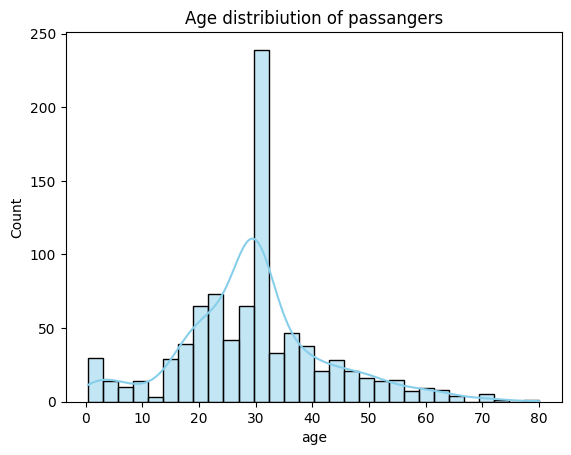

In [ ]:
#univariate analysis
num_cols=df.select_dtypes(include=['int64','float64']).columns
df[num_cols].describe()

#histogram :age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title('Age distribiution of passangers')
plt.show()

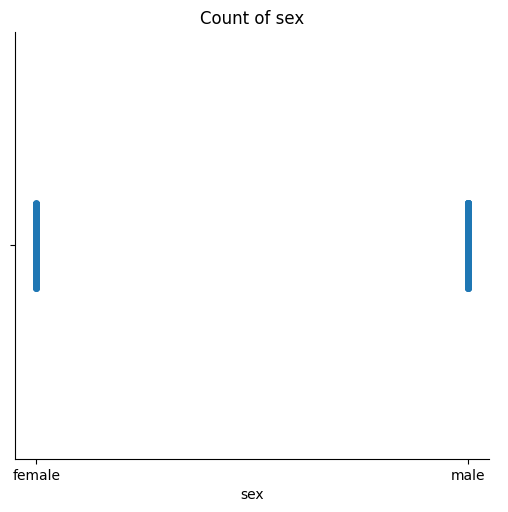

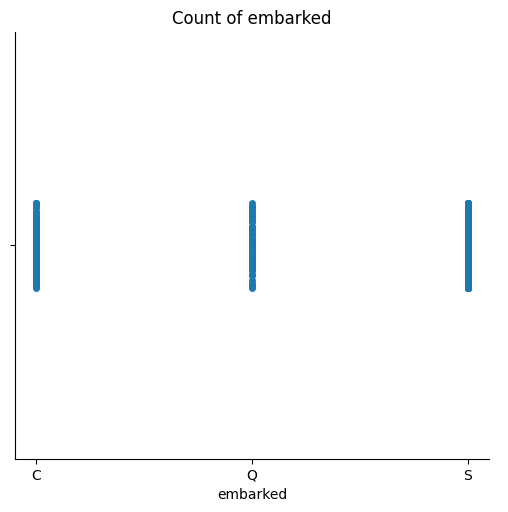

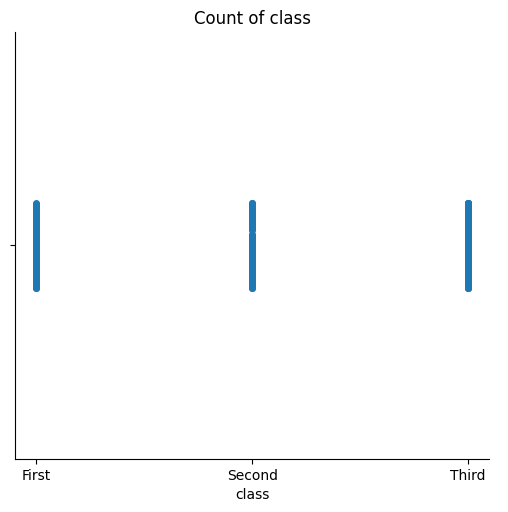

In [ ]:
#univariate - categorical features
cat_cols=df.select_dtypes('category').columns
for col in cat_cols:
  sns.catplot(x=col,data=df)
  plt.title(f"Count of {col}")
  plt.show()

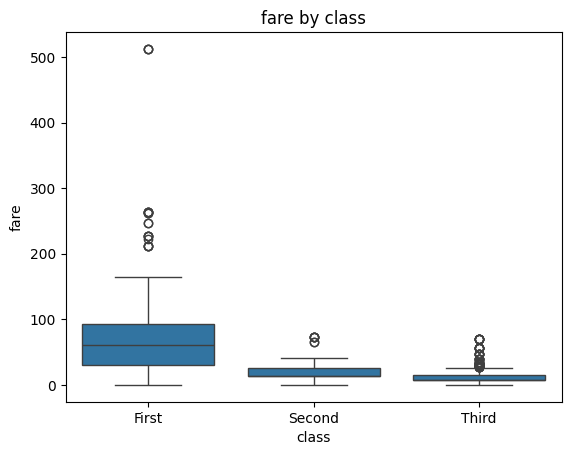

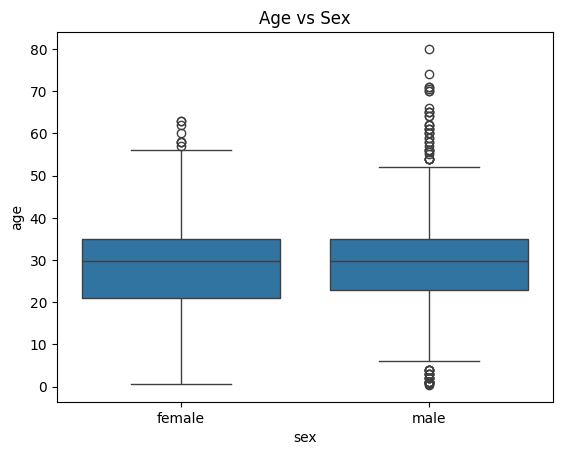

In [ ]:
#bivariate : numerical vs categorical
sns.boxplot(x='class',y='fare',data=df)
plt.title('fare by class')
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title('Age vs Sex')
plt.show()

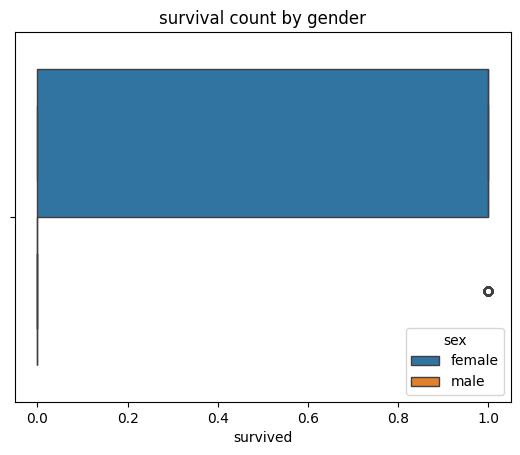

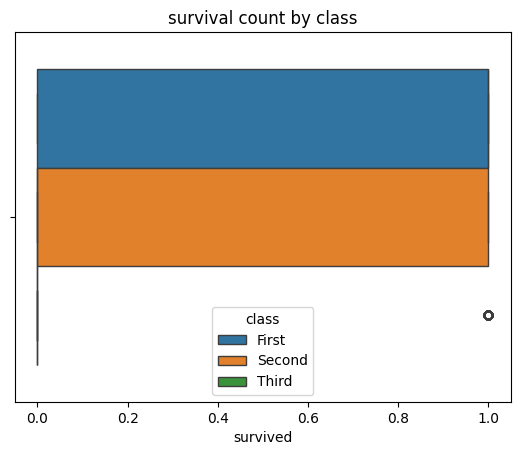

In [ ]:
#bivariate : categorical vs categorical
sns.boxplot(x='survived',hue='sex',data=df)
plt.title('survival count by gender')
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title('survival count by class')
plt.show()

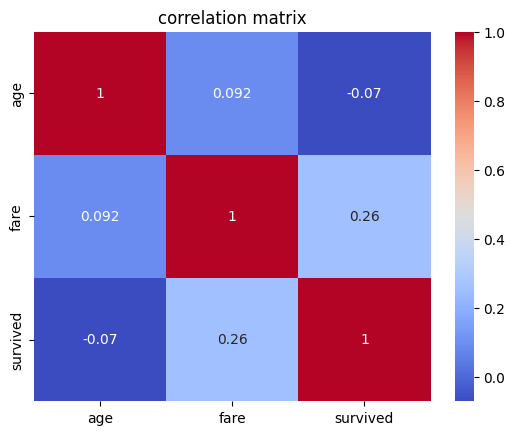

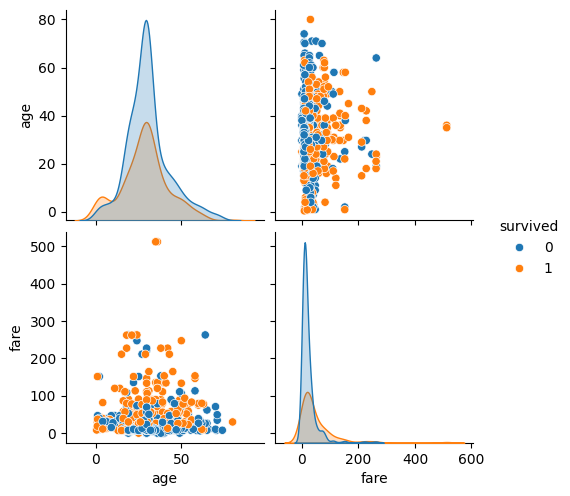

In [ ]:
#correlation and multivariate analysis
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

number of outliers in fare : 116


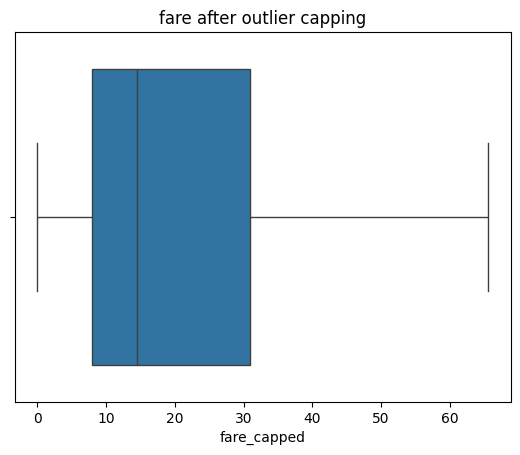

In [ ]:
#outlier detection using IQR
q1=df['fare'].quantile(0.25)
q3=df['fare'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
outliers=df[(df['fare']<lower) | (df['fare']>upper)]
print("number of outliers in fare :",len(outliers))

#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("fare after outlier capping")
plt.show()